In [0]:
import pandas as pd
import numpy as np
INPUT_FOLDER = 'data/'

In [0]:
FILE_NAME = 'sample.csv'
data = pd.read_csv(INPUT_FOLDER+FILE_NAME)
data.head()

,ID,Age,Income,Gender,Marital Status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes


In [0]:
data.dtypes

ID                 int64
Age               object
Income            object
Gender            object
Marital Status    object
Buys              object
dtype: object

In [0]:
data.nunique()

ID                14
Age                3
Income             3
Gender             2
Marital Status     2
Buys               2
dtype: int64

In [0]:
def preprocess_data(data):
  # Drop ID
  if 'ID' in data.columns:
    data = data.drop('ID', axis=1)

  # Apply dummy values in dataframe
  data = pd.get_dummies(data)

  # Drop excess columns
  try:
    excess_columns = ['Age_>35', 'Income_Medium', 'Gender_Male', 'Marital Status_Single', 'Buys_No']
    data = data.drop(excess_columns, axis=1)
  except Exception as e:
    print(e)
    
  return data

In [0]:
# Build a model
from sklearn.tree import DecisionTreeClassifier

def fit_tree(X, y):
  dtree = DecisionTreeClassifier()
  dtree.fit(X, Y)
  return dtree

In [0]:
# Visualize the tree

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz 
import pydotplus
import matplotlib.pyplot as plt

def visualize_tree(trained_decision_tree):

  try:
    dot_data = StringIO()

    export_graphviz(trained_decision_tree, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True)
    
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())
  except Exception as e:
    print(e)
    return False

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


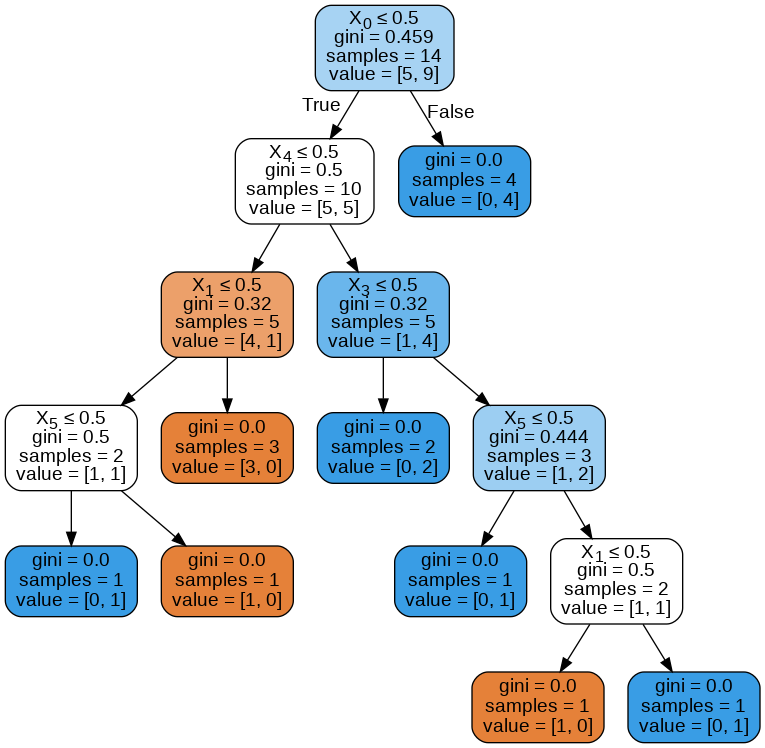

In [0]:
# Main 

data = preprocess_data(data)

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

dtree = fit_tree(X, Y)

visualize_tree(dtree)